In [1]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [2]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20)

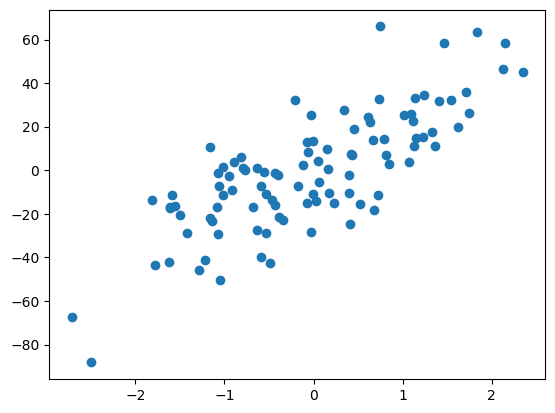

In [3]:
plt.scatter(X,y)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=2)

In [5]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [6]:
reg.coef_

array([18.7243472])

In [7]:
reg.intercept_

np.float64(1.4792114774857719)

In [8]:
y_pred = reg.predict(X_test)

In [9]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5896475355292234

In [10]:
class GDRegressor:
    def __init__(self, learning_rate, epochs):
        self.m = 1
        self.b = 0
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self,X,y):
        for i in range(self.epochs):
            slope_b = -2 * np.sum(y - self.m * np.ravel(X) - self.b)
            slope_m = -2 * np.sum((y - self.m * np.ravel(X) - self.b) * np.ravel(X))
            self.b -= self.lr * slope_b
            self.m -= self.lr * slope_m
        print(self.m,self.b)
    def predict(self,X):
        return self.m * X + self.b

In [11]:
gd = GDRegressor(0.001,100)
gd.fit(X_train, y_train)

18.72434714922188 1.4792114024443972


In [12]:
y_pred = gd.predict(X_test)

In [13]:
r2_score(y_test, y_pred)

0.5896475359832553